<a href="https://colab.research.google.com/github/Lavan1999/Dataset-4_BinaryPredicters_Logit/blob/main/4_BinaryPredicters4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

# **Reading Dataset**

In [ ]:
df = pd.read_csv("/content/Binary predictors.csv")
df

,Marks,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male
...,...,...,...
163,1722,Yes,Female
164,1750,Yes,Male
165,1555,No,Male
166,1524,No,Male


In [ ]:
'''
1---Supervised Data - Binary Classification

Independent = Marks, Gender
Dependent = Admitted

continuous column = Marks
Category column =  Gender, Admitted

2---Correlation Test for Numerical columns - Here we have one numerical column

2--- Hypothesis testing: continuous Vs continuous

3---Hypothesis testing for category VS continous
'''

'\n1---Supervised Data - Binary Classification\n\nIndependent = Marks, Gender\nDependent = Admitted\n\ncontinuous column = Marks\nCategory column =  Gender, Admitted\n\n2---Correlation Test for Numerical columns\n\n2--- Hypothesis testing: continuous Vs continuous\n\n3---Hypothesis testing for category VS continous\n'

# **One sample test**

In [ ]:
#Hypothesis one sample test- YearExperience

for i in range(10):
  sample = df.Marks.sample(frac = 0.05)
  t_test, p_value = stats.ttest_1samp(sample, df.Marks.mean())
  if p_value > 0.05:
    print("H0 Hypothesis null value is accepted, there is no significance difference")
  else:
    print("H0 Hypothesis null value is rejected, there is a significance difference")

H0 Hypothesis null value is accepted, there is no significance difference
H0 Hypothesis null value is accepted, there is no significance difference
H0 Hypothesis null value is accepted, there is no significance difference
H0 Hypothesis null value is accepted, there is no significance difference
H0 Hypothesis null value is accepted, there is no significance difference
H0 Hypothesis null value is accepted, there is no significance difference
H0 Hypothesis null value is accepted, there is no significance difference
H0 Hypothesis null value is accepted, there is no significance difference
H0 Hypothesis null value is accepted, there is no significance difference
H0 Hypothesis null value is accepted, there is no significance difference


In [ ]:
#Central limit theorem: YearsExperiance

population = df.Marks.values
res1 = population.mean()

samplesize = 5

sample_mean= []
for i in range(8):
  sample = np.random.choice(population, samplesize)
  sample_mean.append(sample)

res2 = np.mean(sample_mean)
print(res1,res2)

1695.2738095238096 1798.075


# **Chi2 Test**

In [ ]:
#category Columns - Gender, Admitted

data = pd.crosstab(df['Gender'], df['Admitted'])
data

Admitted,No,Yes
Gender,,
Female,15,63
Male,59,31


In [ ]:
observed_values = np.array(data)
observed_values

array([[15, 63],
       [59, 31]])

In [ ]:
chi2_stat, p_value, _, _= stats.chi2_contingency(observed_values)

if p_value > 0.05:
  print("H0 is accepted")
else:
  print("H0 is rejected")

H0 is rejected


# **ANOVA TEST**

In [ ]:
#Admitted, Marks
group = df['Admitted'].unique()
data = {}
for i in group:
  data[i]=df["Marks"][df["Admitted"]==i]

f_value, p_value = stats.f_oneway( data['No'], data['Yes'] )
print(f_value, p_value)
if p_value<0.05:
  print("H0 - Null hypothesis is rejected which means no relationship exists")
else:
  print("Ha - Null hypothesis is accepted which means relationship exists")

357.4599933502999 2.982007805696707e-43
H0 - Null hypothesis is rejected which means no relationship exists


In [ ]:
#Gender, Marks
group = df['Gender'].unique()
data = {}
for i in group:
  data[i]=df["Marks"][df["Gender"]==i]

f_value, p_value = stats.f_oneway( data['Male'], data['Female'] )
print(f_value, p_value)
if p_value<0.05:
  print("H0 - Null hypothesis is rejected which means no relationship exists")
else:
  print("Ha - Null hypothesis is accepted which means relationship exists")

28.824084013431285 2.636382280493448e-07
H0 - Null hypothesis is rejected which means no relationship exists


# **Machine Learning**

In [ ]:
import statsmodels.api as sm

In [ ]:
# Replacing string value to integer
df["Admitted"] = df["Admitted"].replace({"Yes":1,"No":0})
df["Gender"] = df["Gender"].replace({"Male":10, "Female":50})
df.head()

,Marks,Admitted,Gender
0,1363,0,10
1,1792,1,50
2,1954,1,50
3,1653,0,10
4,1593,0,10


In [ ]:
x1 = df["Marks"]
y = df["Admitted"]

x = sm.add_constant(x1)

result = sm.Logit(y,x).fit()    # Succesfully Model Trained

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


In [ ]:
# Checking the model by giving same data
def func(x,b0,b1):
  return np.array(np.exp(b0+b1*x)/(1+np.exp(b0+b1*x)))

In [ ]:
yhat = np.sort(func(x1,result.params[0],result.params[1]))
x_ = np.sort((np.array(x1)))

# **Visualization**

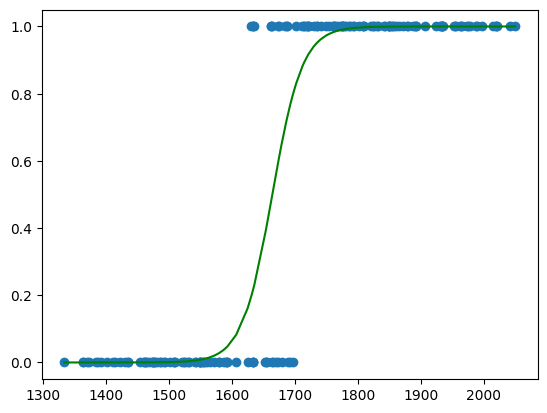

In [ ]:
plt.scatter(x1,y)
plt.plot(x_,yhat,color = 'Green')
plt.show()

In [ ]:
result.predict()

array([3.17509804e-06, 9.95320711e-01, 9.99994789e-01, 3.82545559e-01,
       4.74688306e-02, 9.78241219e-01, 9.90489815e-01, 9.99913075e-01,
       9.99932439e-01, 2.80555331e-02, 9.99693576e-01, 9.99883365e-01,
       4.95824098e-01, 3.31130788e-06, 7.68780343e-01, 9.99588875e-01,
       2.11008877e-01, 2.18086901e-01, 2.32751342e-01, 9.99666730e-01,
       9.99998697e-01, 9.99999144e-01, 3.78484857e-05, 1.40058570e-03,
       9.11780281e-01, 9.99878362e-01, 2.18086901e-01, 9.96920696e-01,
       9.99571245e-01, 9.84988046e-01, 1.86723145e-04, 6.09532977e-01,
       4.12717426e-01, 9.99999674e-01, 9.99588875e-01, 9.99781012e-01,
       4.95824098e-01, 9.99836790e-01, 3.92515016e-01, 1.11951035e-05,
       3.72881439e-02, 1.97361936e-01, 9.99986307e-01, 4.26043595e-06,
       9.97797608e-01, 2.70466415e-05, 9.83006220e-01, 3.81272805e-04,
       5.56342322e-04, 1.28281107e-02, 7.78868807e-03, 9.99999908e-01,
       7.97292345e-01, 6.06406209e-03, 9.99987928e-01, 7.99999369e-06,
      

In [ ]:
np.array(df.Admitted)

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0])

In [ ]:
result.pred_table()

array([[67.,  7.],
       [ 7., 87.]])

In [ ]:
cdf = pd.DataFrame(result.pred_table())
cdf.columns = ["Predicted 0", "Predicted 1"]
cdf = cdf.rename(index={0:"Actual 0", 1:"Actual 1"})
cdf

,Predicted 0,Predicted 1
Actual 0,67.0,7.0
Actual 1,7.0,87.0


# **Admitted vs Gender**

In [ ]:
x1 = df['Gender']
y = df['Admitted']
x = sm.add_constant(x1)
result = sm.Logit(y,x).fit()
#result.pred_table()
dfm = pd.DataFrame(result.pred_table())
dfm.columns=["Predicted 0", "predicted 1"]
dfm = dfm.rename(index={0:'actual 0', 1:'actual 1'})
dfm
cm = np.array(dfm)
acc = ((cm[0,0]+cm[1,1])/cm.sum())*100
acc

Optimization terminated successfully.
         Current function value: 0.572260
         Iterations 5


72.61904761904762

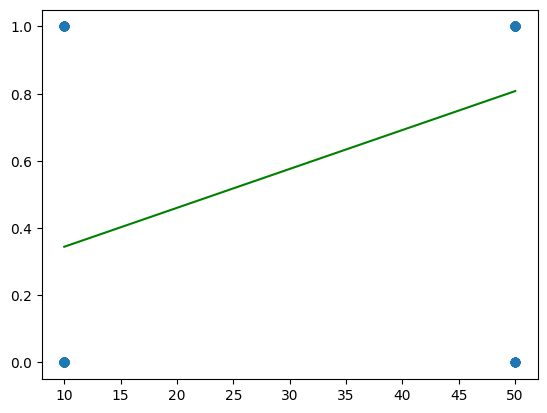

In [ ]:
def fuc (x,b0,b1):
  return np.array((np.exp(b0+b1*x))/ (1+np.exp(b0+b1*x)))
yhat = np.sort(fuc(x1, result.params[0], result.params[1]))
x_ = np.sort(np.array(x1))

plt.scatter(x1,y)
plt.plot(x_,yhat, color ='Green')
plt.show()

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Thu, 21 Mar 2024   Pseudo R-squ.:                  0.1659
Time:                        09:39:23   Log-Likelihood:                -96.140
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 6.283e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1632      0.286     -4.061      0.000      -1.725      -0.602
Gender         0.0520      0.009      5.727      0.000       0.034       0.070
==============================================================================
"""

# **Dependent = 'Admitted,  Independent = 'Gender', 'Marks'**

In [ ]:
x1 = df[['Gender','Marks']]
y = df['Admitted']
x = sm.add_constant(x1)
result = sm.Logit(y,x).fit()
#result.pred_table()
dfm = pd.DataFrame(result.pred_table())
dfm.columns=["Predicted 0", "predicted 1"]
dfm = dfm.rename(index={0:'actual 0', 1:'actual 1'})
dfm
cm = np.array(dfm)
acc = ((cm[0,0]+cm[1,1])/cm.sum())*100
acc

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


94.64285714285714

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Thu, 21 Mar 2024   Pseudo R-squ.:                  0.8249
Time:                        09:41:04   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.8351     16.493     -4.173      0.000    -101.162     -36.508
Gender         0.0486      0.021      2.299      0.022       0.007       0.090
Marks          0.0406      0.010      4.129      0.000       0.021       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
import plotly.express as px

In [ ]:
fig=px.scatter(df, x="Marks",y="Admitted", color="Gender")
fig.show()